## Prueba #0503 (Solución)

### "Aumento de datos"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Codifique las funciones de ayuda.
- Optimice y pruebe un modelo predictivo de su elección.
- Realice aumentos de datos para mejorar la precisión predictiva cuando los datos de entrenamiento proporcionados son pequeños.

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Desactivar las advertencias
%matplotlib inline

#### Leer los datos:
La explicación de los datos originales se puede encontrar [aquí](http://yann.lecun.com/exdb/mnist/).
- Los datos que usaremos son un pequeño subconjunto de los datos originales con solo 100 observaciones.
- Cada observación es la versión "aplanada" de una imagen.
- La primera columna corresponde a la etiqueta (Y).
- El tamaño de la imagen es 28x28.

In [2]:
# Lea los datos de entrenamiento y prueba por separado.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Escale y divida el conjunto de datos en X e Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). Codifique la función auxiliar 'show_data ()' que visualiza cada observación dada. SUGERENCIA: use matplotlib.pyplot.imshow () y scipy.ndimage.interpolation ().

In [3]:
def show_data(X, Y, n, angle=0):
    image_matrix = X[n,:].reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    print(Y[n])

3


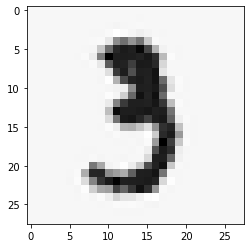

In [4]:
# Ejemplo 1.
show_data(X_train, Y_train,10,+10)

3


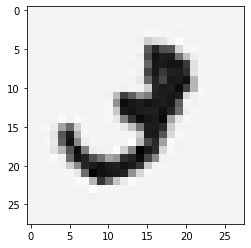

In [5]:
# Ejemplo 2.
show_data(X_train, Y_train,10,-30)

1


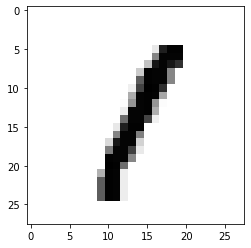

In [6]:
# Ejemplo 3.
show_data(X_train, Y_train,77,0)

2). Elija un algoritmo y realice el análisis predictivo.
- Optimizar los hiperparámetros.
- Calcule la precisión.
- ¿Es la precisión lo suficientemente alta?

In [8]:
estimator_grid = np.arange(30, 101, 10)
depth_grid = np.arange(20, 51, 2)
parameters = {'n_estimators': estimator_grid, 'max_depth': depth_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']

In [9]:
print("Random Forest best n estimator : " + str(best_n_estim))
print("Random Forest best depth : " + str(best_depth))

Random Forest best n estimator : 80
Random Forest best depth : 46


In [10]:
RF_best = RandomForestClassifier(max_depth=best_depth,n_estimators=best_n_estim,random_state=3)
RF_best.fit(X_train, Y_train);
Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.68


3). Codifique la función auxiliar 'rotate_data ()' que rota cada observación dada en un ángulo. SUGERENCIA: use scipy.ndimage.interpolation ().

In [11]:
def rotate_data(X, angle=0):
    image_matrix = X.reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    return image_matrix.reshape((1,-1))

4). Aumente el conjunto de datos de entrenamiento.
- Aumente el tamaño del conjunto de datos de entrenamiento al introducir ligeras rotaciones (en sentido horario y antihorario).
- Utilice la función 'rotate_data ()' definida en el paso anterior.
- No es necesario aumentar el conjunto de datos de prueba.
- Objetivo aproximadamente cinco veces mayor.

In [12]:
N_rows = X_train.shape[0]
N_cols = X_train.shape[1]
X_train_aug = np.empty((0,N_cols))
Y_train_aug = np.array([])
for angle in [-10,-5,0,5,10]:
    for n in range(N_rows):
        a_row = X_train[n,:]
        a_y = Y_train[n]
        X_train_aug = np.concatenate((X_train_aug,rotate_data(a_row,angle)),axis=0)
        Y_train_aug = np.append(Y_train_aug, a_y)

5). Rehaga el análisis predictivo con el conjunto de datos de entrenamiento aumentado.
- Utilice el mismo algoritmo que en el paso 2).
- Calcule la precisión.
- ¿Ha aumentado la precisión?

In [13]:
RF_best = RandomForestClassifier(max_depth=best_depth,n_estimators=best_n_estim,random_state=123)
RF_best.fit(X_train_aug, Y_train_aug);
Y_pred = RF_best.predict(X_test)
print( "Random Forest accuracy with the aumented training data : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest accuracy with the aumented training data : 0.74
